In [1]:
import os
import math
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
from pprint import pprint
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import scipy.stats as sps
import statistics
import random

In [2]:
os.chdir("C:\\Users\\Korisnik\\Desktop\\Pattern Recognition and Machine Learning")
att_names = ['Day','Average Temperature','Maximum temperature','Minimum temperature','Atmospheric pressure at sea level','Average relative humidity','Total rainfall and / or snowmelt','Average visibility','Average wind speed','Maximum sustained wind speed','Output']      
data = pd.read_excel("Dataset sa generatorom.xlsx", header=0, usecols=(0,1,2,3,4,5,6,7,8,9,11), na_values = '-')

In [3]:
data.head()

,Day,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Total rainfall and / or snowmelt,Average visibility,Average wind speed,Maximum sustained wind speed,Output
0,2013-01-01,-2.8,-0.9,-4.0,1021.1,98.0,0.0,0.5,5.0,10.7,0.236121
1,2013-01-02,-1.2,5.0,-5.0,1024.2,95.0,0.0,2.6,3.1,7.2,1.675782
2,2013-01-03,3.3,8.2,-0.2,1033.7,87.0,0.0,9.2,6.3,10.7,-4.666976
3,2013-01-04,6.7,11.4,2.5,1026.0,81.0,0.0,16.3,16.7,28.7,4.681663
4,2013-01-05,6.2,9.6,2.5,1017.5,91.0,3.3,16.3,16.1,25.2,-4.167753


In [4]:
data['Year']=[d.split('-')[0] for d in data.Day.astype(str)]
data['Month']=[d.split('-')[1] for d in data.Day.astype(str)]
data['Day']=[d.split('-')[2] for d in data.Day.astype(str)]

data['Year']=data.Year.astype(int)
data['Day']=data.Day.astype(int)
data['Month']=data.Month.astype(int)

In [5]:
data = data.reindex_axis(['Day','Month','Year','Average Temperature','Maximum temperature','Minimum temperature','Atmospheric pressure at sea level','Average relative humidity','Average visibility','Average wind speed','Maximum sustained wind speed','Total rainfall and / or snowmelt','Output'], axis=1)

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,Day,Month,Year,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure at sea level,Average relative humidity,Average visibility,Average wind speed,Maximum sustained wind speed,Total rainfall and / or snowmelt,Output
0,1,1,2013,-2.8,-0.9,-4.0,1021.1,98.0,0.5,5.0,10.7,0.0,0.236121
1,2,1,2013,-1.2,5.0,-5.0,1024.2,95.0,2.6,3.1,7.2,0.0,1.675782
2,3,1,2013,3.3,8.2,-0.2,1033.7,87.0,9.2,6.3,10.7,0.0,-4.666976
3,4,1,2013,6.7,11.4,2.5,1026.0,81.0,16.3,16.7,28.7,0.0,4.681663
4,5,1,2013,6.2,9.6,2.5,1017.5,91.0,16.3,16.1,25.2,3.3,-4.167753


In [7]:
att_names.remove('Output')
nan_rows = []
j=0
for i in range(len(data)):
    if pd.isnull(data[att_names].values[i]).any():
        nan_rows.append(i)
        j=j+1
print("Number of rows with nan values:", j)

Number of rows with nan values: 16


In [8]:
print(nan_rows)

[76, 83, 270, 343, 347, 435, 558, 729, 774, 972, 973, 975, 1070, 1084, 1091, 1094]


In [9]:
nan_out = []
j=0
for i in range(len(data)):
    if pd.isnull(data['Output'][i]):
        nan_out.append(i)
        j=j+1
print("Number of rows with nan values in Output:", j)

Number of rows with nan values in Output: 31


In [10]:
print(nan_out)

[10, 11, 12, 13, 14, 15, 16, 159, 160, 161, 258, 259, 260, 261, 262, 470, 471, 472, 473, 474, 722, 723, 724, 725, 726, 923, 924, 925, 1084, 1085, 1086]


In [11]:
data['Output']=data['Output'].interpolate(method='index')
for i in att_names:
    data[i]=data[i].interpolate(method='index')

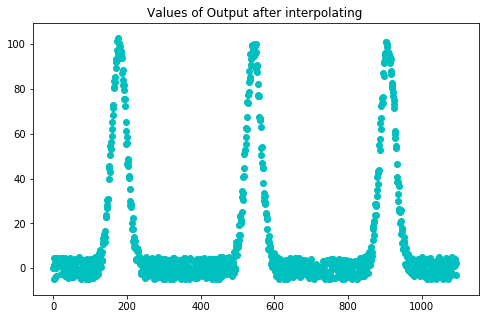

In [12]:
plt.figure(figsize=(8,5))
for i in range(len(data)):
    plt.scatter(i, data['Output'][i],c='c')
plt.title('Values of Output after interpolating ')
plt.savefig("output.png", dpi=100)
plt.show()

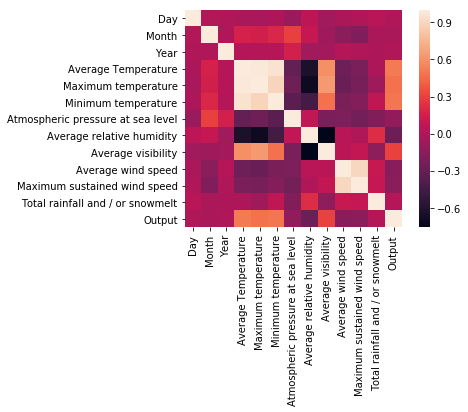

In [13]:
corrmat = data.corr()
sns.heatmap(corrmat, square=True)
plt.savefig('corrmat.png',dpi = 1000)
plt.show()

In [14]:
X = data.drop('Output', axis = 1)
y = np.array(data['Output'])
X_att = list(X.columns)
X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (876, 12)
Training Labels Shape: (876,)
Testing Features Shape: (219, 12)
Testing Labels Shape: (219,)


In [16]:
rf = RandomForestRegressor(bootstrap=True,n_estimators = 50,min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.7540494667135835
Mean Squared Error: 50.686104859009745
Root Mean Squared Error: 7.11941745222246


In [18]:
feature_imp = pd.Series(rf.feature_importances_,index=X_att).sort_values(ascending=False)
feature_imp

Month                                0.568595
Minimum temperature                  0.224399
Average Temperature                  0.124623
Day                                  0.050091
Maximum temperature                  0.010006
Atmospheric pressure at sea level    0.009795
Average relative humidity            0.004366
Average wind speed                   0.003253
Total rainfall and / or snowmelt     0.001497
Year                                 0.001407
Average visibility                   0.001173
Maximum sustained wind speed         0.000795
dtype: float64

No handles with labels found to put in legend.


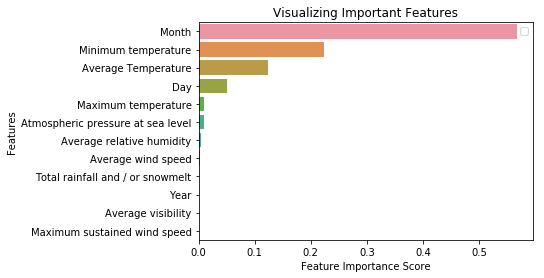

In [19]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.savefig("importance.png", dpi=100)
plt.show()

In [20]:
mean_data = np.mean(data)
mean_data

Day                                    15.720548
Month                                   6.526027
Year                                 2014.000000
Average Temperature                    12.752192
Maximum temperature                    18.105890
Minimum temperature                     7.873333
Atmospheric pressure at sea level    1017.067032
Average relative humidity              76.130137
Average visibility                     15.382146
Average wind speed                      8.960000
Maximum sustained wind speed           14.322557
Total rainfall and / or snowmelt        2.028151
Output                                 13.654532
dtype: float64

In [21]:
def bootstraping(data, n_rows, n_columns):
    data = data.reindex(np.random.permutation(data.index))
    permutovano = np.array(data)
    features = random.sample(range(data.shape[1]-1), n_columns)
    features.append(12)
    features = sorted(features)
    X = permutovano[:n_rows,features]
    Y = permutovano[:n_rows,-1]
    X = pd.DataFrame(X, columns=list(data.columns[features]))
    Y = pd.DataFrame(Y)
    features = list(data.columns[features])
 
    return X, Y, features

In [22]:
x,y,features=bootstraping(data,500, 3)

In [23]:
def find_best_score_kol(x,y):
    scores = []
    x=np.array(x)
    y=np.array(y)
    for i in range(len(x)):
        val = x[i]
        lhs = []
        rhs = []
        for j in range(len(y)):
            if x[j]>= val:
                lhs.append(y[j])
            else:
                rhs.append(y[j])
        lhs = np.array(lhs)
        rhs = np.array(rhs)
        if len(lhs) ==0:
            score_i =  (np.sum((rhs-np.mean(rhs))**2))/len(rhs)
        elif len(rhs) ==0:
            score_i = (np.sum((lhs-np.mean(lhs))**2))/len(lhs)
        else:
            score_i = ( np.sum((lhs-np.mean(lhs))**2))/len(lhs) +  ((np.sum((rhs-np.mean(rhs))**2)))/len(rhs)
        scores.append(score_i)
        score_arr = np.array(scores)
    return min(scores), np.argmin(score_arr)

In [24]:
def best_score(x,y):
    x=np.array(x)
    y=np.array(y)
    d = {}
    for i in range(x.shape[1]-1):
        z = x[:,i]
        d[find_best_score_kol(z,y)[0]] = (find_best_score_kol(z,y)[1], i)
    p = np.array(list(d.keys()))
    q = np.argmin(p)
    return list(d.values())[q]

In [25]:
def CART_score(data, originaldata, features, min_leaf,depth, f_name):
    
    #for i in range(depth):
        if len(data) <= int(min_leaf):
            return np.mean(data[f_name])

        elif (len(data)==0):
            return np.mean(originaldata[f_name])

        elif (depth<=0):
            return np.mean(data[f_name])

        else:
            #parent_mean = np.mean(data[f_name])

            value = data.iloc[best_score(data, data[f_name])[0],best_score(data,data[f_name])[1]]

            root_feature = features[best_score(data,data[f_name])[1]]    

            tree = {root_feature:{}}

            sub_data1 = data.where(data[root_feature] <= value).dropna()

            depth = depth-1

            if not sub_data1.empty:
                subtree1 = CART_score(sub_data1, originaldata, features, min_leaf,depth, 'Output')
                tree[root_feature][0] = subtree1

            sub_data2 = data.where(data[root_feature] > value).dropna()

            if not sub_data2.empty:

                subtree2 = CART_score(sub_data2,originaldata,features,min_leaf,depth, 'Output')
                tree[root_feature][1] = subtree2
            
        return tree   

In [27]:
tree = CART_score(x,x,features,150,10,'Output')

In [28]:
pprint(tree)

{'Minimum temperature': {0: {'Minimum temperature': {0: 0.4346814297885695,
                                                     1: 0.40088285965072895}},
                         1: {'Total rainfall and / or snowmelt': {0: {'Minimum temperature': {0: 13.970083733355871,
                                                                                              1: 34.449192537871085}},
                                                                  1: {'Minimum temperature': {0: 16.36724666128077,
                                                                                              1: 34.28930082146664}}}}}}


In [26]:
# def CART_score(data, originaldata, features, min_leaf,depth, f_name):
    
#     if len(data) <= int(min_leaf):
#         return np.mean(data[f_name])
    
#     elif (len(data)==0):
#         return np.mean(originaldata[f_name])
    
#     elif (depth<=0):
#         return np.mean(data[f_name])
    
#     else:
        
#         features_tree = np.array(features)[:-1]
            
#         root_feature = np.random.choice(features_tree, 1)[0]
        
#         value = np.median(data[root_feature])
  
#         tree = {root_feature:{}}
        
        
#         sub_data1 = data.where(data[root_feature] <= value).dropna()
#         subtree1 = CART_score(sub_data1, originaldata, features, min_leaf, depth, f_name)
#         tree[root_feature][0] = subtree1
        
#         sub_data2 = data.where(data[root_feature] >= value).dropna()
#         subtree2 = CART_score(sub_data2, originaldata, features, min_leaf, depth, f_name)
#         tree[root_feature][1] = subtree2
            
#         return tree   

In [29]:
def predict(query,tree,default = mean_data):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #value = data.iloc[best_score(data, data['Output'])[0],best_score(data,data['Output'])[1]]

            if (query[key]<=np.median(data[key])):
                result = tree[key][0]
            else:
                result = tree[key][1]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result 

In [30]:
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.75*len(dataset))].reset_index(drop=True)
    testing_data = dataset.iloc[int(0.75*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data

In [31]:
data = data.sample(frac=1,replace=True)

In [32]:
training_data = train_test_split(data)[0]
testing_data = train_test_split(data)[1] 

In [33]:
def MSE(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = []
    for i in range(len(data)):
        predicted.append(predict(queries[i],tree,mean_data))
    MSE_tree = np.sum(((data.iloc[:,-1]-predicted)**2)/len(data))
    return MSE_tree

In [34]:
def MSA(data, tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = []
    for i in range(len(data)):
        predicted.append(predict(queries[i],tree,mean_data))
    MAE_tree = np.sum((abs(data.iloc[:,-1]-predicted))/len(data))
    return MAE_tree

In [35]:
tree = CART_score(training_data,training_data,training_data.columns,50,10,'Output')
print('Mean square error (MSE): ',MSE(testing_data,tree), 'Mean absolute error (MAE): ', MSA(testing_data,tree))

Mean square error (MSE):  570.5627793954748 Mean absolute error (MAE):  15.421773544290073


In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 
MSE_test = []
for i in range(1,100):
    tree = CART_score(training_data,training_data,training_data.columns.drop('Output'),i,10,'Output')
    MSE_test.append(MSE(testing_data,tree)) 
min_ins = np.argmin(MSE_test)
ax0.plot(range(1,100),MSE_test,label='Test_Data')
ax0.legend()
ax0.set_title('MSE with respect to the minumim number of leaves per node')
ax0.set_xlabel('Number of minimum leaves')
ax0.set_ylabel('MSE')
plt.savefig("MSE.png", dpi=100)
plt.show()

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(111) 
MSA_test = []
for i in range(1,100):
    tree = CART_score(training_data,training_data,training_data.columns.drop('Output'),i,'Output')
    MSA_test.append(MSA(testing_data,tree)) 
min_ins = np.argmin(MSA_test)
ax0.plot(range(1,100),MSA_test,label='Test_Data')
ax0.legend()
ax0.set_title('MSA with respect to the minumim number of leaves per node')
ax0.set_xlabel('Number of minimum leaves')
ax0.set_ylabel('MSA')
plt.savefig("MSA.png", dpi=100)
plt.show()

In [36]:
def RandomForest_Train(dataset,number_of_Trees):
    
    random_forest_sub_tree = []
    br_features = int(np.sqrt(dataset.shape[1]-1))
    
    for i in range(number_of_Trees):
        
        bootstrap_training_data,y,features = bootstraping(dataset,500,br_features)
        
        random_forest_sub_tree.append(CART_score(bootstrap_training_data,bootstrap_training_data,features,50,10,'Output'))
        
    return random_forest_sub_tree

In [37]:
random_forest = RandomForest_Train(training_data,2)
random_forest

[{'Maximum temperature': {0: {'Maximum temperature': {0: {'Maximum temperature': {0: {'Average Temperature': {0: -1.028706201222135,
         1: 0.6054174131583412}},
       1: {'Maximum temperature': {0: -0.4296883032522033,
         1: 0.10580759957899587}}}},
     1: {'Average Temperature': {0: {'Atmospheric pressure at sea level': {0: -1.4180413129918918,
         1: -0.05309934859236755}},
       1: {'Atmospheric pressure at sea level': {0: 3.675335253757433,
         1: 3.1227433652064094}}}}}},
   1: {'Maximum temperature': {0: {'Maximum temperature': {0: {'Maximum temperature': {0: 9.691522174773013,
         1: 15.00652814815718}},
       1: {'Average Temperature': {0: 18.866408589717977,
         1: 32.71962139192825}}}},
     1: {'Average Temperature': {0: {'Maximum temperature': {0: 14.762936570186305,
         1: 31.13272022471324}},
       1: {'Atmospheric pressure at sea level': {0: 34.22102466910952,
         1: 56.513239199482555}}}}}}}},
 {'Minimum temperature': {0: {

In [38]:
def RandomForest_Predict(query,random_forest,default='p'):
    predictions = []
    for tree in random_forest:
        predictions.append(predict(query,tree,default='p'))
    pred = np.mean(predictions)
    return pred

In [39]:
query = testing_data.iloc[70,:].drop('Output').to_dict()

query_target = testing_data.iloc[70,5]
print('target: ',query_target)

prediction = RandomForest_Predict(query,random_forest)
print('prediction: ',prediction)

target:  19.8
prediction:  31.837101762713147


In [40]:
def RandomForest_Test(data,random_forest,default='p'):
    predictions = []
    for i in range(len(data)):
        query = data.iloc[i,:-1]
        p = RandomForest_Predict(query,random_forest,default='p')
        predictions.append(p)
    return predictions

In [ ]:
accuracy_mse = []
accuracy_msa = []
for i in range(1,11,1):
    random_forest = RandomForest_Train(testing_data,i)
    MSE = np.sum(((testing_data.iloc[:,-1]-RandomForest_Test(testing_data,random_forest,default='p'))**2)/len(testing_data.iloc[:,-1]))
    MSA = np.sum((abs(testing_data.iloc[:,-1]-RandomForest_Test(testing_data,random_forest,default='p')))/len(testing_data.iloc[:,-1]))
    accuracy_mse.append(MSE)
    accuracy_msa.append(MSA)
for i in range(10,110,10):
    random_forest = RandomForest_Train(testing_data,i)
    MSE = np.sum(((testing_data.iloc[:,-1]-RandomForest_Test(testing_data,random_forest,default='p'))**2)/len(testing_data.iloc[:,-1]))
    MSA = np.sum((abs(testing_data.iloc[:,-1]-RandomForest_Test(testing_data,random_forest,default='p')))/len(testing_data.iloc[:,-1]))
    accuracy_mse.append(MSE)
    accuracy_msa.append(MSA)
print(accuracy_mse, accuracy_msa)

In [ ]:
style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(211)
ax0.plot(np.logspace(0,2,20),accuracy_mse)
ax0.set_yticks(np.linspace(350,800,20))
ax0.set_title("Accuracy mse with respect to the numer of trees in the random forest")
ax0.set_xlabel("Number of Trees")
ax0.set_ylabel('Accuracy mse')

ax1 = fig.add_subplot(212)
ax1.plot(np.logspace(0,2,20),accuracy_msa)
ax1.set_yticks(np.linspace(350,800,20))
ax1.set_title("Accuracy msa with respect to the numer of trees in the random forest")
ax1.set_xlabel("Number of Trees")
ax1.set_ylabel('Accuracy msa')
plt.savefig("accuracy.png", dpi=100)
plt.show()

In [1]:
def krosvalidacija(data):
    greska = 0
    godine = [2013,2014,2015]
    for i in godine:
        data_test = data[data['Year']== godine[i]]
        data_train = data[data['Year'] != godine [i]]
        output = list(data[data['Year']== godine[i]]['Output'])
        rendomf_train = RandomForest_Train(data_train,5)
        rendomf_test_predikcija = RandomForest_Test(data_test, randomf_train ,default='p')
        MSE = sum((rendomf_test_predikcija - output)**2)/len(output)
        greska = greska + MSE
        
    return greska/3